In [ ]:
# Margaret Johnston
# Homework 8 - due 18 April

## Homework:

Highly nonlinear oscillator: 

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-0.01\*y[0]\**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal.
(Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
import cmath  
import numpy as np


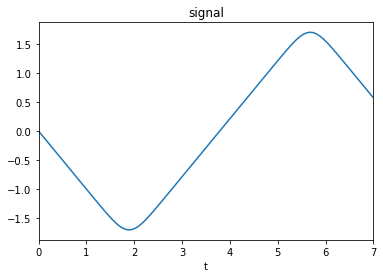

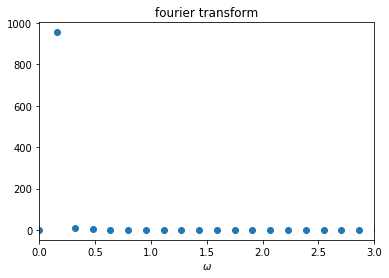

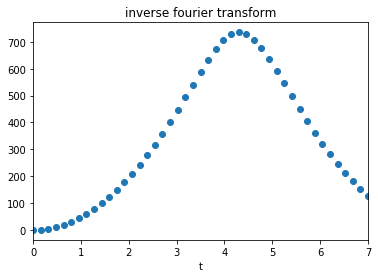

In [38]:
#   Initialization
a = 0.
b = 7
n = 100
twopi  = 2.*pi
sq2pi = 1./sqrt(twopi)
step = 2.*pi/n

ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

dftz  = zeros( n, complex )                  # Complex elements
nplot = zeros( n, float )   
fplot = zeros( n, float ) 
inv_ft  = zeros( n, complex )                  # Complex elements
inv_n = zeros( n, float )   
inv_f = zeros( n, float ) 

def f( t, y):                            # Force function 
    fReturn[0] = y[1]                                         
    fReturn[1] = -0.01*y[0]**11  
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                        # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

def fourier2(dftz):                                              # DFT
    for iii in range(0, n):              
        zsum = complex(0.0, 0.0)                
        for jjj in range(0, n):                              
            zexpo = complex(0, twopi*jjj*iii/n)           # Complex exponent
            zsum += yp[jjj]*exp(-zexpo)           
        dftz[iii] = zsum * sq2pi      
        nplot[iii] = iii/n/step
        fplot[iii] = dftz[iii].imag*dftz[iii].imag+dftz[iii].real*dftz[iii].real

def inv_fourier2(inv_ft):
    for iii in range(0,n):
        zsum = complex(0.0, 0.0)                
        for jjj in range(0, n):                              
            zexpo = complex(0, twopi*jjj*iii/n)           # Complex exponent
            zsum += dftz[jjj]*exp(zexpo)    
        inv_ft[iii] = zsum*sq2pi
        inv_n[iii] = iii/n/step
        inv_f[iii] = inv_ft[iii].imag*inv_ft[iii].imag+inv_ft[iii].real*inv_ft[iii].real
        
# creating the signal
while (t < b):                          # Time loop
    if ((t + h) > b):
        h = b - t                       # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])

# taking the fourier transform
fourier2(dftz)
# taking the inverse fourier transform
inv_fourier2(inv_ft)

plt.plot(xp,yp)
plt.xlabel("t")
plt.title("signal")
plt.xlim([a,b])
plt.show()
plt.scatter(nplot,fplot)
plt.xlabel(r"$\omega$")
plt.title("fourier transform")
plt.xlim([0.,3.])
plt.show()
plt.scatter(inv_n,inv_f)
plt.xlabel("t")
plt.title("inverse fourier transform")
plt.xlim([a,b])
plt.show()

The fourier transform only has one frequency that contributes significantly to the signal. We would expect that other harmonics contribute significantly because the original signal is sufficiently different from the sin wave. The triangle behavior of the original signal should require contributions from several harmonics.

Although the harmonics are not captured by the fourier transform, the period is well described. With the invers transform, we recover a function with the same period as the signal, but unsurprisingly the shape is very different. Without the harmonics necessary to describe the original signal, we are left with a function that is very different.